# Week 4: Namespaces, NumPy, and plotting with matplotlib

In this worksheet, we discuss the important concepts of *namespace* and *scope* in Python. We also (re-)introduce the **NumPy** module -- and specifically, how we can use **NumPy arrays** to handle mathematical problems. Finally, we introduce the module **matplotlib**, and its interface **pyplot**, to create plots and graphs and visualise data and results.

The best way to learn programming is to write code. Don't hesitate to edit the code in the example cells, or add your own code, to test your understanding. You will find practice exercises throughout the notebook, denoted by 🚩 **Exercise $x$**.

In [1]:
from show_solutions import show, initialise_path
show = initialise_path(show, '../solutions/w04_solutions.md')

---
## Namespaces and scope

Namespaces and scope are important concepts to understand, particularly now that you know how to write your own functions, and now that we are going to start using more modules.

#### Namespace

Roughly speaking, a **namespace** is a collection of names, together with the objects they refer to. It's the lookup table that Python uses to find objects in memory by their labels.

If we go back once again to the drawer or box analogy, sticking a new label on a box is *adding that name to the namespace*.

In [2]:
a = 5
b = 2
print(a + b)
print(d)

7


NameError: name 'd' is not defined

Here, we first add the names `a` and `b` to the namespace -- that is, we stick the labels `a` and `b` on 2 boxes in memory. Then, when we tell Python to compute and print `a + b`, it looks at the *namespace* to find the boxes with *names* (labels) `a` and `b`. It also looks for the box named `print` (which contains the function that allows us to display things on the screen).

Since `d` is not in the namespace (there is no box with label `d`), Python cannot find it, and it returns a `NameError`.

#### Scope

When you run a Python script, generally, more than one namespace is created. A **scope** is a part of your code from where you can access a certain namespace -- that is, where you can find the variables in that namespace by just typing their names.

This should be clearer with an example:

In [3]:
outside = 7

def func():
    inside = 2
    print('Inside the function...')
    print(outside)
    print(inside)

func()

print('Now we are outside...')
print(outside)
print(inside)

Inside the function...
7
2
Now we are outside...
7


NameError: name 'inside' is not defined

Functions in Python have their own namespaces. When we run the command `func()` on line 9, a namespace is created for that function, and any variables *created* when the function is called (here, the variable `inside`) are added to the function's namespace. These variables can be referred to *inside the function* by using their names -- for example, we are able to `print(inside)` on line 7. Any code which is also part of the function definition can access this namespace. At this point in the code (here, lines 4-7), we are in the **local scope**.

Note that we can also `print(outside)` on line 6, even though `outside` is not part of the function's namespace. From the point of view of the code inside the function, `outside` is part of the **global scope**. In the local scope (lines 4-7), Python first tries to search the local scope's namespace for the name `outside`; since it can't find anything, it then tries to search in the global scope's namespace, where `outside` does exist.

The function's namespace is **deleted** once the function exits (that is, once the command `func()` has finished executing). The global scope does *not* have access to the local scope inside it, and trying to `print(inside)` outside the function on line 13 leads to a `NameError`.

The following example is another interesting consequence of the function creating and then deleting its own namespace:

In [4]:
outside = 7

def func():
    outside = 12
    # The name "outside" refers to 12 here locally...
    print(outside)

func()

# ...but here, "outside" still refers to the one defined globally
print(outside)

12
7


Another interesting one -- `print(outside)` works in the first function, but not in the second function, because Python now detects that there _will be_ a name `outside` in the function's namespace. The error message says that this `local variable` is used in the function before actually being assigned a value -- when we ran the code that defines the function, Python prepared a label `outside` to add to the function's namespace, but hasn't stuck it on a box yet (that would happen on line 8). But because the label exists in the local scope, it supersedes the one defined on line 1 in the global scope.

In [5]:
outside = 7

def func():
    print(outside)

def func2():
    print(outside)
    outside = 1

func()
func2()

7


UnboundLocalError: cannot access local variable 'outside' where it is not associated with a value

### Importing modules

We saw in Week 1 how to import the Numpy module to get more functions. There are different ways you can import a module -- you can also only import selected functions or attributes from a particular module, if you need just a few specific things, instead of importing the whole module.

For example, when we `import numpy as np`, we import all functions and attributes of `numpy` as a *separate* namespace, which we call `np`. This means that, for example, the `cos()` function of Numpy can only be accessed by specifically indicating that Python should look in the `np` namespace, by typing `np.cos()`.

If we know that we just want the function `cos()`, we could also choose to import only that function into the main namespace, with `from numpy import cos`. This means that we won't need to prefix `cos()`, but this also means that if the name `cos` already existed in the main namespace, it gets overwritten.

In [6]:
# Import a module as a separate namespace
import numpy as np

print(np.cos(np.pi))

# Import something from a module into the main namespace
from numpy import cos, pi

print(cos(pi))

-1.0
-1.0




---
**📚 Learn more:**

- [Python scopes and namespaces](https://docs.python.org/3/tutorial/classes.html#python-scopes-and-namespaces) - The Python tutorial
- [Modules](https://docs.python.org/3/tutorial/modules.html#modules) - The Python tutorial
- [Mastering Python Namespaces and Scopes](https://www.adrianperea.dev/mastering-python-namespaces-and-scopes/) - Adrian Perea - A very nicely explained tutorial on namespaces and scopes in Python.

---

---
## Numpy arrays

We introduced the Numpy module when we needed to use some mathematical functions to compute values (e.g. `np.cos()`, `np.sqrt()`...). Another one of Numpy's useful functionalities is the **`ndarray` type** (stands for "N-dimensional array", usually referred to as "Numpy array"). Numpy arrays are *containers*, like lists, which allow us to store and handle vectors and matrices efficiently. (If you are familiar with MATLAB, Numpy arrays are quite similar to MATLAB arrays.)


### Creating arrays manually

The function `np.array()` is used to create an array. It takes a **list** as an input argument, and returns an array where the rows are the elements of the list. For example, to create a vector or a matrix:

In [7]:
# Start by importing Numpy
import numpy as np

# Create a vector
v = np.array([3, 4, -2.8, 0])
print(v)
print(type(v))

# Create a matrix: pass a list of lists to np.array(),
# each element of which is a row of the matrix
id_4 = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])
print(id_4)

# Use the second (optional) input argument of np.array()
# to specify the type of its elements:
id_4_float = np.array([[1, 0, 0, 0],
                       [0, 1, 0, 0],
                       [0, 0, 1, 0],
                       [0, 0, 0, 1]], dtype=float)
print(id_4_float)

[ 3.   4.  -2.8  0. ]
<class 'numpy.ndarray'>
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


---
**Note:** 1-D Numpy arrays (vectors) are *not* row vectors or column vectors -- they are similar to lists, in this sense.

---

### Some useful functions to construct arrays

Numpy also has many useful functions to construct arrays with particular properties, for example:
- `np.zeros()`, `np.ones()` to create arrays full of zeros or ones
- `np.eye()` for the identity matrix
- `np.random.random()`, `np.random.randint()` for matrices of random real numbers or random integers
- `np.arange()`, `np.linspace()` for vectors of equally spaced values
- `array.shape` to retrieve the dimensions of an array as a tuple

In [10]:
# Create a matrix of zeros
A = np.zeros([3, 7])
print(A)

# Create a vector of ones
u = np.ones(5)
print(f'u = {u}')

# Create the 4x4 identity matrix, as above
id_4_mat = np.eye(4)
print(id_4_mat)

# Create a matrix of pseudo-random numbers between 0 and 1,
# sampled from a uniform distribution
B = np.random.random([3, 3])
print(f'B = {B}')

# Create a 1D array (a vector) with a range of floats
v = np.arange(3.1, 5.2, 0.3)
print(f'v = {v}')

# Create a 1D array (a vector) of 21 linearly spaced values
w = np.linspace(0, 4, 21)
print(f'w = {w}')

# Retrieve the dimensions of an array, as a tuple
print(f'The shape of A is {A.shape}.')

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
u = [1. 1. 1. 1. 1.]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
B = [[0.62423892 0.39800652 0.8268505 ]
 [0.28522594 0.19316358 0.99284291]
 [0.66983106 0.05881884 0.94925006]]
v = [3.1 3.4 3.7 4.  4.3 4.6 4.9 5.2]
w = [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4. ]
The shape of A is (3, 7).


Note that the `.shape` *attribute* of `ndarray` objects is a *tuple* `(n_rows, n_columns)` (a little bit like a list -- we'll see those in more detail in a few weeks), taking as values the dimensions of an array. (`.shape` is *not* a method -- it doesn't perform any operations, like a function would do, it is simply a property of `ndarray` objects, a value associated with the object. **Note that it is not followed by parentheses, like a method would be**.)

For those functions which require to specify the dimensions of the target array, these dimensions are given as *one argument* -- a **sequence of integers**. For example, a *range* and a *list* are two different types of sequence -- here, we've used a list, `[n_rows, n_columns]` when creating `A` and `B`:

```python
A = np.zeros([3, 7])
B = np.random.random([3, 3])
```


Another useful functionality for constructing arrays is the `.reshape()` *method* of the `ndarray` type. It takes one input argument, the shape of the target array, and broadcasts the values in the array to which it is applied into this new shape. For instance, here are four ways to construct the matrix

$$
M =
\begin{pmatrix}
0.1 & 0.2 & 0.3 \\
0.4 & 0.5 & 0.6 \\
0.7 & 0.8 & 0.9
\end{pmatrix}
$$

In [14]:
# First way: giving the list of rows explicitly
M1 = np.array([[0.1, 0.2, 0.3],
               [0.4, 0.5, 0.6],
               [0.7, 0.8, 0.9]])
print(M1)

# Second way: using range() and .reshape()
# Note that range() returns a sequence, which we can therefore use
# directly as the input argument for np.array()
M2 = 0.1 * np.array(range(1, 10)).reshape((3, 3))
print(M2)

# Third way: using np.arange() and .reshape
M3 = np.arange(0.1, 1, 0.1).reshape((3, 3))
print(M3)

# Fourth way: using np.linspace() and .reshape()
M4 = np.linspace(0.1, 0.9, 9).reshape([3, 3])
print(M4)

[[0.1 0.2 0.3]
 [0.4 0.5 0.6]
 [0.7 0.8 0.9]]
[[0.1 0.2 0.3]
 [0.4 0.5 0.6]
 [0.7 0.8 0.9]]
[[0.1 0.2 0.3]
 [0.4 0.5 0.6]
 [0.7 0.8 0.9]]
[[0.1 0.2 0.3]
 [0.4 0.5 0.6]
 [0.7 0.8 0.9]]


---
**📚 Learn more:**
* [NumPy: the absolute basics for beginners](https://numpy.org/doc/stable/user/absolute_beginners.html)
* [NumPy User Guide](https://docs.scipy.org/doc/numpy/user/)
* [NumPy Reference](https://docs.scipy.org/doc/numpy/reference/index.html)
* [NumPy array function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)
* [The N-dimensional array (ndarray)](https://docs.scipy.org/doc/numpy-1.12.0/reference/arrays.ndarray.html)
* [Array creation routines](https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.array-creation.html#routines-array-creation)
* [Generate random arrays with Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random)

---

🚩 **Exercise 1**

Create two variables `M` and `y`, assigned with Numpy arrays representing the matrix $M$ and vector $y$ defined as

$$
M =
\begin{pmatrix}
9 & 3 & 0 \\
-2 & -2 & 1 \\
0 & -1 & 1
\end{pmatrix}, \qquad
y =
\begin{pmatrix}
0.4 \\ -3 \\ -0.3
\end{pmatrix}.
$$

In [17]:
import numpy as np

# Create the matrix M
M = np.array([[9, 3, 0], [-2, -2, 1], [0, -1, 1]])
print(M)

# Create the vector y
y = np.array([0.4, -3, -0.3])
print(y)

[[ 9  3  0]
 [-2 -2  1]
 [ 0 -1  1]]
[ 0.4 -3.  -0.3]


In [18]:
show('Exercise 1')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### Element-wise operations

The basic operators `+`, `-`, `*`, `/`, and `**` can be used to perform **element-wise** operations between
* two arrays of the *same size*, or
* an array and a number.

In [19]:
# Yet another way to construct the matrix from earlier...
A = 0.1 * np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])
print("A = ")
print(A)

B = np.eye(3)

print("\nA + B =")
print(A + B)

print("\nA - B =")
print(A - B)

print("\nA * B =")
print(A * B)

print("\nA ** 2 =")
print(A ** 2)

print("\n B / A =")
print(B / A)

A = 
[[0.1 0.2 0.3]
 [0.4 0.5 0.6]
 [0.7 0.8 0.9]]

A + B =
[[1.1 0.2 0.3]
 [0.4 1.5 0.6]
 [0.7 0.8 1.9]]

A - B =
[[-0.9  0.2  0.3]
 [ 0.4 -0.5  0.6]
 [ 0.7  0.8 -0.1]]

A * B =
[[0.1 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.9]]

A ** 2 =
[[0.01 0.04 0.09]
 [0.16 0.25 0.36]
 [0.49 0.64 0.81]]

 B / A =
[[10.          0.          0.        ]
 [ 0.          2.          0.        ]
 [ 0.          0.          1.11111111]]


---
🚩 **Exercise 2**

Write a function `dot_prod()`, which takes 2 input arguments `u` and `v`, both 1D NumPy arrays (vectors), and returns the dot product of the 2 vectors, **in one line of code** (two lines total, including the `def` statement). You are not allowed to use the function `np.dot()` from NumPy -- code it yourself. You can test your function on any two vectors by comparing the result to the output of `np.dot(u, v)`.

The dot product of 2 vectors $\mathbf{u}, \mathbf{v} \in \mathbb{R}^n$ is given by
$$
\mathbf{u} \cdot \mathbf{v} = \sum_{i=1}^n u_i v_i.
$$

In [25]:
import numpy as np

def dot_prod(u, v):
    '''
    Returns the dot product of vectors u and v.
    '''
    return np.sum(u * v)

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(dot_prod(a, b))
print(np.dot(a, b))

32
32


In [20]:
show('Exercise 2')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### Indexing and slicing Numpy arrays

To access an element in a Numpy array in a given position, we can use **indexing**, just like for other sequences. The main difference is that an element in an $N$-dimensional Numpy array is indexed by $N$ integers, each representing the element's position along a dimension.

Concretely:
* `v[i]` is the ($i+1$)th element of the vector `v`.
* `A[i, j]` is the element in the ($i+1$)th row and ($j+1$)th column of the matrix `A`.
* `X[i, j, k, h, ...]` is used to index elements for tensors in higher dimensions.

Everything we have seen when **slicing** lists and strings also works on Numpy arrays. A few examples:

In [26]:
# Create a 4x4 matrix
A = np.arange(1/4, 17/4, 1/4).reshape((4, 4))
print(A)

# Print some slices
print(A[1, 3])
print(A[0, :])    # row 0, all elements
print(A[:, 2])    # all elements, columns 2
print(A[2:, :-1]) # rows 2 to the last, columns 0 to the second-to-last

print(A[0::2, 1]) # every second row starting from 0, column 1

[[0.25 0.5  0.75 1.  ]
 [1.25 1.5  1.75 2.  ]
 [2.25 2.5  2.75 3.  ]
 [3.25 3.5  3.75 4.  ]]
2.0
[0.25 0.5  0.75 1.  ]
[0.75 1.75 2.75 3.75]
[[2.25 2.5  2.75]
 [3.25 3.5  3.75]]
[0.5 2.5]


---
**📚 Learn more:**

- [Indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html) - Numpy documentation
- [Indexing basics](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing) - Numpy documentation

---
🚩 **Exercise 3**

What does this code do?

In [29]:
# Create a random number generator
rng = np.random.default_rng()

# Create a random 3x5 matrix of integers between 1 and 10
A = rng.integers(1, 11, size=[3, 5])
print(A, '\n')

# Create a Boolean array the same shape as A, with True when the corresponding 
# elements of A are smaller than 5, and False elsewhere
A5 = A < 5
print(A5, '\n')

# Use A5 to return all elements of A smaller than 5 (in a 1D array)
print(A[A5], '\n')

# Display the rows of A starting at row 1, and columns ending at column 2
print(A[1:, :3], '\n')

# Display the element of that sub-matrix which are smaller than 5
print(A[1:, :3][A5[1:, :3]], '\n')

# Reassign all elements of A which are greater than or equal to 5 with the value 100
A[np.logical_not(A5)] = 100
print(A)

[[ 4  9  4  2  6]
 [ 9 10  9  9  7]
 [ 4  6  1  6  2]] 

[[ True False  True  True False]
 [False False False False False]
 [ True False  True False  True]] 

[4 4 2 4 1 2] 

[[ 9 10  9]
 [ 4  6  1]] 

[4 1] 

[[  4 100   4   2 100]
 [100 100 100 100 100]
 [  4 100   1 100   2]]


In [30]:
show('Exercise 3')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 4**

Define a variable `n` with some integer value $2 \leq n \leq 50$ of your choice. Using two nested for-loops, create an array `A` representing a matrix $A \in \mathbb{R}^{n\times n}$, where the element $(i, j)$ in row $i$, column $j$ is given by
$$
a_{ij} = \begin{cases}
i + 2j, \quad & \text{if } i < j, \\
ij, \quad &\text{otherwise,}
\end{cases}
\quad \text{for } i, j = 0, 1, 2, \dots, n-1.
$$

To check your code, for example, for $n=4$, you should have
$$
A = \begin{pmatrix}
0 & 2 & 4 & 6 \\
0 & 1 & 5 & 7 \\
0 & 2 & 4 & 8 \\
0 & 3 & 6 & 9
\end{pmatrix}.
$$

In [31]:
import numpy as np

# Defina a variable n
n = 4

# Create an empty matrix with all zeros
A = np.zeros([n, n])

# Loop over the rows...
for i in range(n):
    # Loop over the columns...
    for j in range(n):
        if i < j:
            A[i, j] = i + 2*j
        else:
            A[i, j] = i*j

print(A)

[[0. 2. 4. 6.]
 [0. 1. 5. 7.]
 [0. 2. 4. 8.]
 [0. 3. 6. 9.]]


In [32]:
show('Exercise 4')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 5**

Define a variable `n` with value $n = 2000$. Create an array `A` representing a random matrix $A \in \mathbb{R}^{n\times n}$, with elements taking values between $-1$ and $1.05$. What is the proportion of rows of $A$ which have a positive row sum?

If you're not sure how to create a random matrix, you can search the Numpy documentation, or look back at previous examples where we used random arrays.

In [47]:
import numpy as np

# Define a variable n with value n = 2000
n = 2000

# Create a random number generator
rng = np.random.default_rng()

# Create a random nxn matrix A with elements taking values between -1 and 1.05
A = (1.05 + 1) * rng.random([n, n]) - 1.

# Get the sum of all rows of A
row_sums = np.sum(A, axis=1)

# Display the proportion of rows with a positive sum
positive_sum_rows = np.sum(row_sums >= 0)
print(f'The probability that a row of A is positive',
      f'is approximately {100 * positive_sum_rows / n : .1f}%.')



The probability that a row of A is positive is approximately  96.9%.


In [33]:
show('Exercise 5')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### Creating arrays by copying other arrays

Sometimes, it's convenient to create a copy of an existing array. The **safest** way to do this is by using the `.copy()` method:

In [48]:
# Create a vector A
A = np.linspace(0, 100, 11)

# Create another vector B, with the same elements as A
B = A.copy()

# Display both
print(A)
print(B)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


This makes a **copy** of all the numbers in memory currently stored in the box labelled `A`, puts them in their own drawers, and creates another box called `B` to put them in. Then, we can make changes to the elements of `A` or `B` without affecting the other:

In [49]:
# Change the first 3 elements of A
A[:3] = 1

# Display A and B
print(A)
print(B)

[  1.   1.   1.  30.  40.  50.  60.  70.  80.  90. 100.]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


But what happens if we don't use `.copy()`?

In [50]:
# Create a vector A
A = np.linspace(0, 100, 11)

# Create another vector B, with the same elements as A
B = A

# Display both; so far, so good
print(A)
print(B)

# Change the first 3 elements of A
A[:3] = 1

# Display A and B; B has also been changed!
print(A)
print(B)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
[  1.   1.   1.  30.  40.  50.  60.  70.  80.  90. 100.]
[  1.   1.   1.  30.  40.  50.  60.  70.  80.  90. 100.]


Remember **Exercise 4** from the Week 1 notebook. If we don't explicitly ask Python to create a copy of the values in `A` (by using `.copy()`), it simply *reuses* the values that are already stored in memory in the box labelled `A`, and just sticks another label on the same box, called `B`. Now, the **same objects** can be referred to using either the label `A` or the label `B`; this means that if we change some of the contents of `A`, we automatically change the same elements in `B`.

---
**📚 Learn more:**
- [ndarray.copy()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.copy.html)
- [Copies and Views](https://numpy.org/doc/stable/user/quickstart.html#copies-and-views) - NumPy documentation
- [How to create an array from existing data](https://numpy.org/doc/stable/user/absolute_beginners.html#how-to-create-an-array-from-existing-data) - NumPy beginner's guide

---

### Matrix operations and linear algebra

We saw in a previous section that `A * B` returns the *element-wise* product of `A` and `B`. The function `np.matmul()` (and its operator alias, `@`) allows to compute **matrix products**:

In [51]:
A = 2 * np.ones([2, 4])
print("A =")
print(A)

B = 0.4 * np.eye(4)
print("B =")
print(B)

v = np.random.random(4)
print("v =")
print(v)

# Products AB and BA^T
print(np.matmul(A, B))
print(np.matmul(B, A.T))
print(np.matmul(B, A.transpose()))

# Products Av and v^T B
print(np.matmul(A, v))
print(np.matmul(v, B))

# Dot product of v with itself
print(np.matmul(v, v))

# We can also use the operator @ to do exactly the same thing:
print(B @ A.T)
print(A @ v)
print(v @ B)
print(v @ v)

A =
[[2. 2. 2. 2.]
 [2. 2. 2. 2.]]
B =
[[0.4 0.  0.  0. ]
 [0.  0.4 0.  0. ]
 [0.  0.  0.4 0. ]
 [0.  0.  0.  0.4]]
v =
[0.15346302 0.70713279 0.68065276 0.13681588]
[[0.8 0.8 0.8 0.8]
 [0.8 0.8 0.8 0.8]]
[[0.8 0.8]
 [0.8 0.8]
 [0.8 0.8]
 [0.8 0.8]]
[[0.8 0.8]
 [0.8 0.8]
 [0.8 0.8]
 [0.8 0.8]]
[3.3561289 3.3561289]
[0.06138521 0.28285312 0.2722611  0.05472635]
1.005594447635939
[[0.8 0.8]
 [0.8 0.8]
 [0.8 0.8]
 [0.8 0.8]]
[3.3561289 3.3561289]
[0.06138521 0.28285312 0.2722611  0.05472635]
1.005594447635939


Note the different behaviours of `np.matmul()`, depending on the dimensions of its arguments. All cases are outlined in the documentation linked below. Also note the `.T` notation used to **transpose** arrays.

Numpy has a **sub-module** called `linalg`, which contains many useful functions for linear algebra and matrix operations. If we imported Numpy as `np`, for example, then to use the functions in `linalg`, you will need to prefix them with `np.linalg.`. Some of the functions provided by the `np.linalg` submodule are:

In [52]:
# Create a random 3x3 matrix and a vector of three 1s
A = np.random.random([3, 3])
b = np.ones(3)

print(np.linalg.eigvals(A))              # Eigenvalues of a matrix: note the complex values here, j=sqrt(-1)
eig_val_A, eig_vec_A = np.linalg.eig(A)  # Eigenvalues and right eigenvectors
print("Eigenvalues: ", eig_val_A)
print("Eigenvectors: ", eig_vec_A)

print('\nQR and SVD:')
Q, R = np.linalg.qr(A)       # Q-R matrix decomposition
print("Q =", Q)
print("R =", R)
U, S, V = np.linalg.svd(A)   # Singular value decomposition
print("U =", U)
print("S =", S)
print("V =", V)

print('\nInverse and determinant:')
print("A^(-1) =", np.linalg.inv(A))  # Inverse of a matrix
print("det(A) =", np.linalg.det(A))  # Determinant of a matrix

print('\nSolution of Ax = b:')
print("x =", np.linalg.solve(A, b))  # Solve Ax = b for x

[ 1.89488758 -0.21675294  0.04829347]
Eigenvalues:  [ 1.89488758 -0.21675294  0.04829347]
Eigenvectors:  [[ 0.72924755  0.65589712  0.01080301]
 [ 0.44563934 -0.54835864 -0.72053463]
 [ 0.51923366 -0.51875021  0.69333479]]

QR and SVD:
Q = [[-0.65540365  0.75161286  0.07432479]
 [-0.49931692 -0.35735172 -0.78929232]
 [-0.56668216 -0.55441669  0.60950263]]
R = [[-1.44534876 -0.85367844 -0.8674488 ]
 [ 0.          0.19859177  0.19810827]
 [ 0.          0.          0.06910397]]
U = [[-0.72599051  0.68498711 -0.06107742]
 [-0.44908896 -0.53947867 -0.71223723]
 [-0.52082328 -0.48964828  0.69927654]]
S = [1.89851663 0.21689289 0.04817006]
V = [[-0.75764679 -0.45758198 -0.46539239]
 [-0.65241223  0.51114331  0.55954517]
 [ 0.01815558 -0.72756529  0.68579817]]

Inverse and determinant:
A^(-1) = [[ -1.7937334    1.5335207    1.94426645]
 [  2.71178137   9.59457163 -11.59034769]
 [  1.07555018 -11.42180874   8.82008136]]
det(A) = -0.019835214680195737

Solution of Ax = b:
x = [ 1.68405375  0.716

---
**📚 Learn more:**
* [numpy.linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)
* [numpy.matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html#numpy.matmul)

---

🚩 **Exercise 6**

Solve $Mx = y$ for $x$, using `np.linalg.solve()`, where $M$ and $y$ are defined as in Exercise 1.

*For checking:* the result should be `[-2.56666667  7.83333333  7.53333333]`.

Print the $2$-norm  and the $\infty$-norm of $x$. (Search the `np.linalg` documentation!)

In [57]:
import numpy as np

# Create the matrix M
M = np.array([[9, 3, 0], [-2, -2, 1], [0, -1, 1]])
print(M)

# Create the vector y
y = np.array([0.4, -3, -0.3])
print(y)

# Solve Mx = y for x
x = np.linalg.solve(M, y)
print('\nSolution of Mx = y:')
print(f'x = {x}')

# Print the norms
print(f'The 2-norm of x is {np.linalg.norm(x, 2)}.')
print(f'The infinity-norm of x is {np.linalg.norm(x, np.inf)}.')


[[ 9  3  0]
 [-2 -2  1]
 [ 0 -1  1]]
[ 0.4 -3.  -0.3]

Solution of Mx = y:
x = [-2.56666667  7.83333333  7.53333333]
The 2-norm of x is 11.166915420114895.
The infinity-norm of x is 7.833333333333329.


In [55]:
show('Exercise 6')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
## Plotting with `matplotlib.pyplot`

### A first plot

The `matplotlib` library and its `pyplot` interface contain a very large number of built-in functions for plotting data.

We import the plotting tools with

```python
import matplotlib.pyplot as plt
```

A basic line plot is generated using the `plt.plot()` function. For example, to plot $x \sin \left( x \right)$ for $x \in \left[ 0, 2 \pi \right]$:
* first, create a reasonably large number of values of $x$ at which to plot the function, for example using `np.linspace()` from the Numpy module;
* then, evaluate the function at these values;
* finally, **create** a line plot with `plt.plot()`, and **display it** with `plt.show()`.

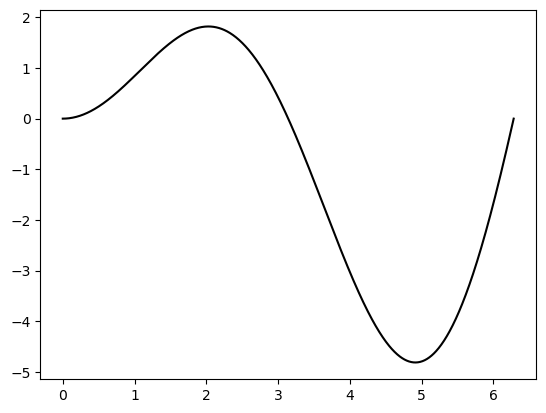

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Create an x-axis with 1000 points
x = np.linspace(0., 2*np.pi, 1000)

# Evaluate the function at all these points
y = x * np.sin(x)

# Create the plot and display it
plt.plot(x, y, 'k-')
plt.show()

The final argument of `plt.plot()` defines the line colour and line type: here `'k'` indicates black, and `'-'` indicates a solid line.

The `plt.plot` function can be used to generate scatter plots by replacing the character indicating the line style (for example `-` for a solid line) with a symbol to indicate a marker style. For example

```python
plt.plot(x, y, 'kx')
```

plots a scatter plot with black crosses. Here the `x` character in the final argument indicates the marker type.
    
---
**📚 Learn more:**
* [Matplotlib: Python plotting](https://matplotlib.org/contents.html) - Matplotlib documentation
* [Matplotlib gallery](https://matplotlib.org/gallery/index.html)
* [Pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) - Matplotlib documentation
* [Matplotlib line style reference](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html)
* [Matplotlib: Specifying Colors](https://matplotlib.org/users/colors.html) - Matplotlib documentation
* [Matplotlib: markers](https://matplotlib.org/api/markers_api.html) - Matplotlib documentation
* [numpy.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) - Numpy documentation
* [Chapter 4: Visualization with Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/#4.-Visualization-with-Matplotlib) - J. VanderPlas, *The Python Data Science Handbook*

---

When plotting functions you should ensure that you evaluate the function at a sufficient number of points (typically at least $100$). `plt.plot(x, y)` draws one point per element in `x` and `y` (coordinates (`x[0], y[0]`), (`x[1], y[1]`), etc.), and joins these points with straight lines; a line plot therefore only looks smooth if the grid of points is dense enough. Try replacing `1000` with `10` in the code cell above to see this.

---
🚩 **Exercise 7**

Create a plot of the following functions on the interval $x \in \left[ -\pi, \pi \right]$. Try different line colours and types. Don't forget to `import matplotlib.pyplot as plt`, or to run the previous example cell to import it.
* a) $f_1(x) = \sin \left( x \right)$,  
* b) $f_2(x) = \tan \left( \frac{49}{100} x \right)$,  
* c) $f_3(x) = \sin \left( x \right) \cos \left( 2 x \right)$.

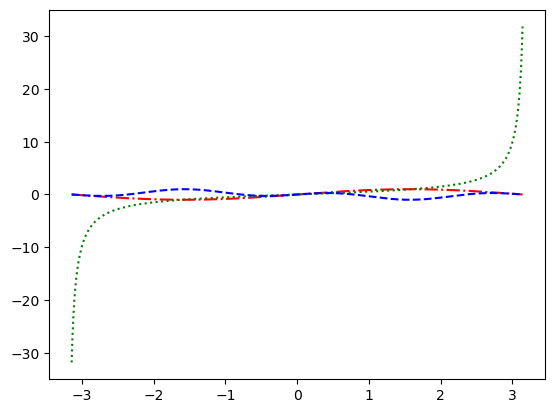

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Create an x-axis with 1000 points
x = np.linspace(-np.pi, np.pi, 1000)

# Evaluate the functions at all these points
f1 = np.sin(x)
f2 = np.tan(0.49*x)
f3 = np.sin(x) * np.cos(2*x)

# Create the plots in the same axes
plt.plot(x, f1, 'r-.')
plt.plot(x, f2, 'g:')
plt.plot(x, f3, 'b--')

# Display the plot
plt.show()


In [60]:
show('Exercise 7')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### Figures and axes as objects

By default, if no plot exists, `plt.plot()` creates a *figure* window, and adds a set of *axes* to the figure. If a set of axes has already been created, when running `plt.plot()` a second time, the same axes are re-used, and the second plot is drawn over the first one. (This is true until you call `plt.show()`; further `plt.plot()` commands after a `plt.show()` will start another figure in your notebook.)

Like everything in Python, figures and axes are **objects**. The `plt.subplots()` function can used to create a new figure object, along with one or more set(s) of axes inside it. The statement

```python
fig, ax = plt.subplots(m, n)
```

creates a figure object, which we assign to the variable `fig`, and an **array** of axes, assigned to the variable `ax`, tiled in `m` rows and `n` columns.

Then, we can select individual axes in the array, and use `.plot()` as before (this time, as a **method** of the `Axes` object). Try it:

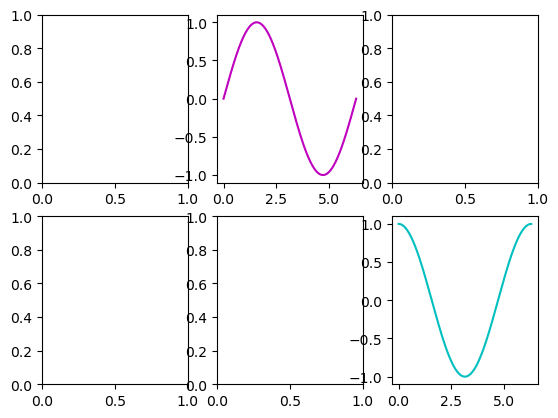

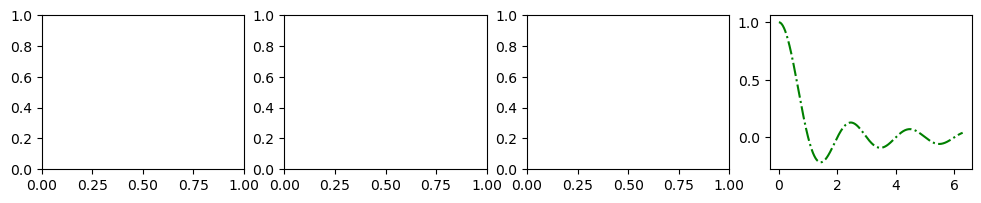

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define x
x = np.linspace(0, 2*np.pi, 1000)

# Create figure and axes
fig_1, ax_1 = plt.subplots(2, 3)

# We can also create a second figure, with the optional
# "figsize" argument of plt.subplots()
fig_2, ax_2 = plt.subplots(1, 4, figsize=(12, 2))

# Plot on 1st row, 2nd column of the first figure
ax_1[0, 1].plot(x, np.sin(x), 'm-')

# Plot on 2nd row, 3rd column
ax_1[1, 2].plot(x, np.cos(x), 'c-')

# Plot on 4th plot of the second figure
ax_2[3].plot(x, np.sinc(x), 'g-.')

# Show the result
plt.show()

Try changing the axes onto which these appear (for instance, try the second set of axes in the second figure).

Note that, when using `plt.subplots(m, n)` with `m` or `n` equal to `1` (that is, when creating a **single** row or column of plots), as is the case for `ax_2`, you only need **one index** to access a given subplot.

---
**📚 Learn more:**
* [Matplotlib Usage Guide: Parts of a figure](https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure) -- **highly recommended read!**

---

🚩 **Exercise 8**

Use the `plt.subplots()` function to plot the three functions in the previous exercise in one figure, with a different subplot for each.

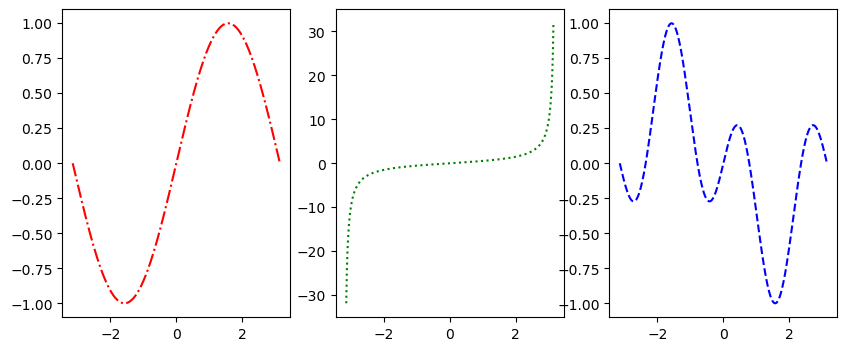

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Create an x-axis with 1000 points
x = np.linspace(-np.pi, np.pi, 1000)

# Evaluate the functions at all these points
f1 = np.sin(x)
f2 = np.tan(0.49*x)
f3 = np.sin(x) * np.cos(2*x)

# Create figure and axes
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# Plot each function in a different subplot
ax[0].plot(x, f1, 'r-.')
ax[1].plot(x, f2, 'g:')
ax[2].plot(x, f3, 'b--')

# Display the plot
plt.show()

In [68]:
show('Exercise 8')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
## Basic reading and writing data from/to an external file

One of the buzzwords that you hear frequently in our time is "data". It is not an exaggeration to say “data” is changing the face of our world and it has becoming the capital of our era. Python is great at working with data and that is one of the reasons it has received so much love and attention in the last decade or so. There are many different types of data developed for different applications (texts, binaries, spreadsheets and so on), and there are also various ways to access data from a file, and to save the results to a file. Here we will discuss the basic way to open and read data from a **text** file. Later in the course, we will learn more about dealing with table-like data such as Excel files.

In the directory containing this notebook you should find the text file `mytextfile.txt`. 
In Python, we can **open** files by creating a **file object** with a name. It is also very important to **close** the file when we are done with it to avoid losing data or corrupting our files.


### Using `open()` and `.close()`

In the cell below:
- First, we open our file with the Python function `open()`, and assign it as a file object to the name `myfile`.
- Then we read its content, and save it in a variable `contents`.
- At the end, we close our file using the method `.close()`.

The content of this file can now be viewed by printing the variable `contents`. Try to check the type of this variable with `print(type(contents))`. 

In [3]:
myfile = open('mytextfile.txt','r')
contents = myfile.read()
myfile.close()

print(contents)
print(type(contents))

Hello I am text for your Python Programming Course. This is my first line.
I want to tell you: YOU ARE WONDERFUL! Now I am finishing my second line.
It is rude not to say goodbye, so I am finishing my third line by saying BYE!
<class 'str'>


In Python, we can open a file in different **modes**, which will allow us to do different things with it. In the example above, we opened the file `mytextfile.txt` using the argument `'r'`, which means "**r**ead mode", so that we are able to read the contents, but cannot write anything into the file. Alternatively, we could have used `'r+'` to be able to both read from and write to the file.

In [ ]:
myfile = open('mytextfile.txt','r+')
contents = myfile.read()
myfile.close()

print(contents)

### Using the `with` statement

Instead of using `open()` and `.close()` to open and close a file each time we want to access it, we can use the `with` statement as shown below, which automatically closes the file when the *block* ends. We can also read the file line by line by using the `.readline()` method of file objects:

In [15]:
with open('mytextfile.txt','r') as myfile:
    lines_content = myfile.readline()

print(lines_content)

['Hello I am text for your Python Programming Course. This is my first line.\n', 'I want to tell you: YOU ARE WONDERFUL! Now I am finishing my second line.\n', 'It is rude not to say goodbye, so I am finishing my third line by saying BYE!']


As you can see, only the first line is read. Try to use `.readline()` three times to read all the lines in the file.

---
🚩 **Exercise 9** 

Complete the following code to read all the lines in the file one by one until the end of the file, and store them in the list `all_lines`. You can either use `.readlines()` (search the documentation!), or use a `while` loop to read the text line by line using `.readline()`.

In [18]:
# first approach: using 'readline'
with open('mytextfile.txt','r') as myfile:
    # Initialise an empty list to store the lines
    all_lines = []

    # if line is empty, the end of file is reached 
    while True:
        # use readline to read the next line...
        line = myfile.readline()

        # Break the loop when we reach an empty line (remember Boolean casting!)
        if not line:
            break

        # Append to the list if we still have non-empty lines
        all_lines.append(line)

# second approach: using 'readlines'
with open('mytextfile.txt', 'r') as myfile:
    all_lines = myfile.readlines()

print(all_lines)
print(all_lines[1])
        

['Hello I am text for your Python Programming Course. This is my first line.\n', 'I want to tell you: YOU ARE WONDERFUL! Now I am finishing my second line.\n', 'It is rude not to say goodbye, so I am finishing my third line by saying BYE!']
I want to tell you: YOU ARE WONDERFUL! Now I am finishing my second line.



In [12]:
show('Exercise 9')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

Note the `'\n'` characters in the strings of each line when we do this. They are **newline** characters, a hidden character which encodes in the string that at that point a new line should begin. Try `print(all_lines[1])` and see what happens.

### Writing to a file

We can also write text to a file, and this is often the best way to store the results of our computations, as we will often want to calculate an answer and be able to refer back to it. 

In Python we can **create** a new file and **open** it, by using `open()` with the argument `'w'` (meaning "**w**rite mode") to be able to write into it. We also need to write the output into the file rather than display it on the screen. Here is how we do it -- using the `.write()` method of file objects:

In [19]:
text1 = 'Here is the text to write into the file.'
text2 = 'Here is the second line of text to write into the file.'

with open('mytextfile_new.txt', 'w') as mynewfile:
    mynewfile.write(text1)
    mynewfile.write(text2)

Now you should find a text file called `mytextfile_new.txt` in the directory where this notebook is running. Open the file and look at it. You will notice that both of our strings were added on one line. If we want them to appear on different lines we need to add the `'\n'` character ourselves at the end of each line, like so:

In [22]:
text1 = 'Here is the text to write into the file.'
text2 = 'Here is the second line of text to write into the file.'

with open('mytextfile_new.txt', 'w') as mynewfile:
    mynewfile.write(text1 + '\n')
    mynewfile.write(text2 + '\n')

Now open the file `mytextfile_new.txt` and check its content. Do you see a difference?

---
🚩 **Exercise 10**

Write a script that reads the content of `mytextfile.txt` line by line, and adds a line number followed by `': '` before each line. For example, the first line turns into 

```python
'1: Hello I am text for your Python Programming Course. This is my first line'
```

After adding the line numbers, the script should write all the new lines in a new file `textfile_linenumber.txt`. Your final file should contain three lines. 

In [23]:
# Method 1
# Read the file, store the lines in three variables
with open('mytextfile.txt', 'r') as myfile:
    line1 = myfile.readline()
    line2 = myfile.readline()
    line3 = myfile.readline()

# Edit and write each new line to a new file
with open('textfile_linenumber.txt', 'w') as linenumber:
    linenumber.write('1: ' + line1)
    linenumber.write('2: ' + line2)
    linenumber.write('3: ' + line3)

In [25]:
# Method 2
# Read the file, store the lines in a list
with open('mytextfile.txt', 'r') as myfile:
    all_lines = myfile.readlines()

# Edit and write each new line to a new file
with open('textfile_linenumber.txt', 'w') as newfile:
    count = 1
    for line in all_lines:
        newfile.write(f'{count}: {line}')
        count += 1

In [24]:
show('Exercise 10')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…